In [96]:
#author = 0712238@NCTU, Maxwill Lin, YT Lin
#last update = 2019.11.4
#usage = HW1 of Deep Learning 2019 fall @ NCTU 
#regression part 
#preprocess with normaliztion and one-hot vectorization
#NN architectur = NN([17, 9, 5, 1],activations=['sigmoid', 'sigmoid', 'relu'], usage = 'regression')
#train and test with split data set
#learning curve + train/test RMS
#save files

In [67]:
import numpy as np
import math
import pandas as pd
from model import *
import csv
import matplotlib.pyplot as plt
import pickle

In [68]:
#preprocessing
df = pd.read_csv("EnergyEfficiency_data.csv")
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [69]:
def get_onehot(df, name):
    A = df[name].values
    n = A.shape[0]
    onehot_A = np.zeros((n,max(A)-min(A)+1))
    onehot_A[np.arange(n), A-min(A)] = 1
    return onehot_A

def normalize(X):
    s = [ np.mean(dim) for dim in X.T]
    X = np.asarray([np.divide(x, s) for x in X])
    return X

O = get_onehot(df, "Orientation")
G = get_onehot(df, "Glazing Area Distribution")
y = df["Heating Load"].values.reshape((-1,1))
y.shape
Other = df.drop(['Orientation', 'Glazing Area Distribution', "Heating Load"], axis=1).values

X = np.c_[normalize(Other), O, G]
assert(X.shape[1] == O.shape[1]+G.shape[1]+Other.shape[1])

def partition(X, y, ratio=0.75):
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    p = int(n*ratio)
    train_X = X[:p]
    test_X = X[p:]
    train_y = y[:p]
    test_y = y[p:]
    return train_X, train_y, test_X, test_y

train_X, train_y, test_X, test_y = partition(X, y, ratio=0.75)

In [84]:
nn = NN([17, 9, 5, 1],activations=['sigmoid', 'sigmoid', 'relu'], usage = 'regression')
#the network architecture is as the constructer

learning_curve = nn.train(train_X, train_y, epochs=70, batch_size=10, lr = .1)

train_RMS = nn.calc_error(train_X, train_y)
test_RMS = nn.calc_error(test_X, test_y)

train_RMS =  0.23428887187450503 
 test_RMS =  0.33525151455973384


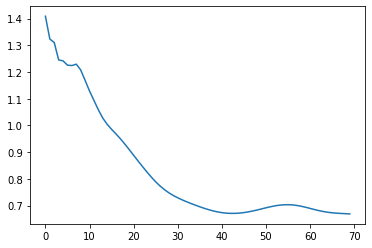

In [95]:
plt.plot(np.arange(len(learning_curve)), learning_curve)
print('train_RMS = ', train_RMS, '\n', 'test_RMS = ', test_RMS)

In [94]:
reg_train_csv = "reg_trainning_pred.csv" 
reg_test_csv = "reg_testing_pred.csv" 
with open(reg_train_csv, 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['prediction', 'label'])
    for i in range(train_X.shape[0]):
        writer.writerow([nn.prediction(np.asarray([train_X[i]]))[0][0], train_y[i][0]])
with open(reg_test_csv, 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['prediction', 'label'])
    for i in range(test_X.shape[0]):
        writer.writerow([nn.prediction(np.asarray([test_X[i]]))[0][0], test_y[i][0]])

In [ ]:
#savefilename = "savenn"
#with open(savefilename, 'wb') as fo:
#    pickle.dump(nn, fo)